In [12]:

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs

import pandas as pd
f1 = pd.read_csv("C:\\Users\\lll\\Documents\\motion\\data\\02_01.csv")
f2 = pd.read_csv("C:\Users\lll\Documents\motion\data\02_02.csv")
f3 = pd.read_csv("/Users/Documents/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/Documents/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/Documents/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/Documents/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/Documents/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/Documents/data/07_04/07_04.csv")
cap = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8],axis=0)
t1 = pd.read_csv("/Users/Documents/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/Documents/data/02_02/test3.csv")
t3 = pd.read_csv("/Userso/Documents/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/Documents/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/Documents/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/Documents/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/Documents/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/Documents/data/07_04/test3.csv")
rob = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-12-0ea3ddbf5315>, line 36)

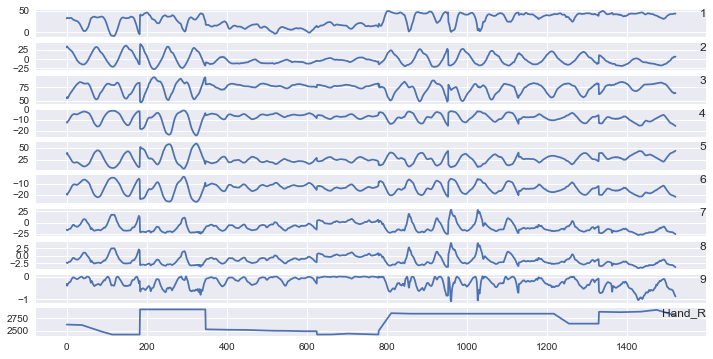

In [58]:
dataset = pd.concat([full['1'],full['2'],full['3'],full['4'],full['5'],full['6'],full['7'],full['8'],full['9'],full['Hand_R']] , axis=1 )
dataset.head()
type(dataset)
import matplotlib.pyplot as plt
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,4,5,6,7,8,9]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [61]:
values/180

array([[ 1.78722222e-01,  1.73477778e-01,  3.03388889e-01, ...,
        -1.27655556e-02, -1.78544444e-03,  1.45777778e+01],
       [ 1.88527778e-01,  1.89783333e-01,  3.14805556e-01, ...,
        -1.39316667e-02, -2.24422222e-03,  1.45763158e+01],
       [ 1.83116667e-01,  1.75355556e-01,  3.04144444e-01, ...,
        -1.32627778e-02, -1.93711111e-03,  1.45748538e+01],
       ...,
       [ 2.41900000e-01,  3.13550000e-02,  3.59705556e-01, ...,
        -2.04494444e-02, -4.45116667e-03,  1.56183673e+01],
       [ 2.41000000e-01,  3.33883333e-02,  3.58783333e-01, ...,
        -2.09361111e-02, -4.65572222e-03,  1.56054422e+01],
       [ 2.38527778e-01,  3.68311111e-02,  3.56466667e-01, ...,
        -2.14444444e-02, -4.87338889e-03,  1.55925170e+01]])

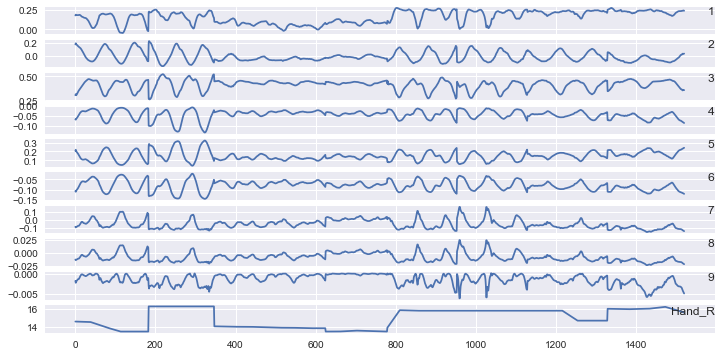

(1000, 3) (1000,)


In [62]:
from sklearn import preprocessing
values = dataset.values
#values = dataset.astype(np.float32)
n_features=3
#for i in range(4):
#    scaled[:,i] =values[:,i] - np.mean(values[:,i], axis = 0)



#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = values/180

groups = [0, 1, 2, 3,4,5,6,7,8,9]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(scaled[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()


#for i in reversed(range(scaled.shape[1]-4)):
#    scaled[:,i+3] = scaled[:,i+3] - scaled[:,i]

train = scaled[:1000,:]
val = scaled[1000:,:]




n_obs = n_features
train_X,train_y = train[:,:n_obs],train[:,-1]
val_X,val_y = val[:,:n_obs],val[:,-1]#第一个多少行
#test_X,test_y = test[:,:n_obs],test[:,-1]
print(train_X.shape,train_y.shape)

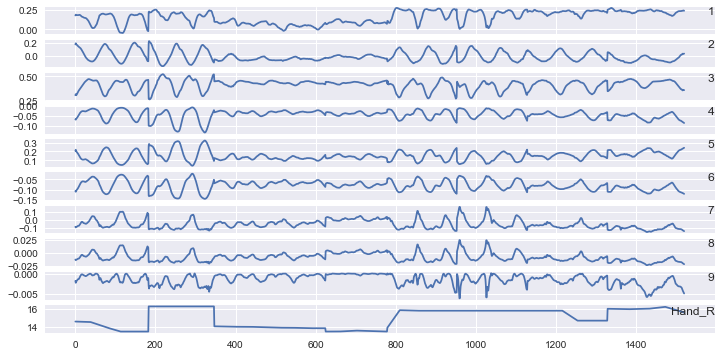

In [63]:
values
groups = [0, 1, 2, 3,4,5,6,7,8,9]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(scaled[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [7]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection


In [8]:
rf = RandomForestRegressor(n_estimators=190, 
                           max_features= 'sqrt',verbose= 0 )
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [9]:
print('5-fold cross validation:\n')
stack = StackingCVRegressor(regressors=(rf,xgb,ENet, KRR,lgb, gbm), 
                          meta_regressor=ENet)

for clf, label in zip([rf,xgb, ENet, KRR, gbm,  stack], 
                      ['rf',
                       'XGBRegressor', 
                       'ENet', 
                       'KRR',
                       'gbm',
                       
                       'stack']):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
    scores = np.sqrt(-model_selection.cross_val_score(clf, train_X, train_y, 
                                              cv=kf,scoring='neg_mean_squared_error'))
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 0.3041 (+/- 0.0637) [rf]
Accuracy: 0.2832 (+/- 0.0684) [XGBRegressor]
Accuracy: 0.2575 (+/- 0.0823) [ENet]
Accuracy: 0.2524 (+/- 0.0837) [KRR]
Accuracy: 0.2893 (+/- 0.0715) [gbm]
Accuracy: 0.2599 (+/- 0.0717) [stack]


In [10]:

#Validation function
n_folds = 5
#def rmsle_cv(model):
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
score= np.sqrt(-cross_val_score(stack, train_X, train_y, scoring="neg_mean_squared_error", cv = kf))
#return(rmse)
#score = rmsle_cv(lasso)
print("\n stack score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 stack score: 0.2598 (0.0709)



In [27]:
#sclf.fit(train_X,train_y)


NameError: name 'sclf' is not defined

In [11]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
stack.fit(train_X, train_y)
#sclf_pred = sclf.predict(X_train.values)
stack_train_pred = stack.predict(train_X)
stack_pred = stack.predict(val_X)
print(rmsle(train_y, stack_train_pred))

0.22926587180884178


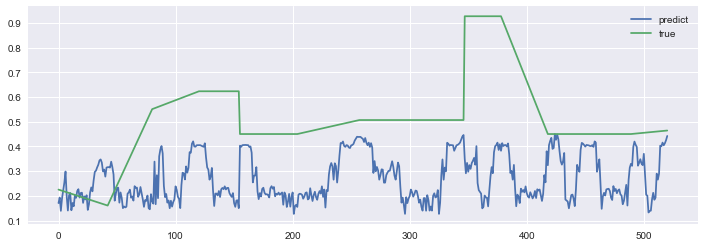

In [12]:
plt.figure()
plt.plot(stack_pred, label = 'predict')
plt.plot(val_y, label = 'true')
plt.legend()
plt.show()